# __YÜKSEK DAYANIMLI BETON__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 999)
pd.set_option("display.float_format", "{:.3f}".format)
sns.set()

In [2]:
cc = pd.read_csv('concrete_clean.csv')

In [3]:
cc.head(3)

,Cement,Slag,FlyAsh,Water,SPs,CoarseAgg,FineAgg,WC,Day,Strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,0.300,28,79.986
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,0.300,28,61.887
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,0.686,90,40.270


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [5]:
Y = cc['Strength']
X = cc.drop(['Strength'], axis=1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [10]:
k_range = np.arange(1, 15)
test_score = np.empty(len(k_range))

for i, k in enumerate(k_range):
    knn = KNeighborsRegressor(n_neighbors = k, weights = 'distance')
    knn.fit(x_train, y_train)
    test_score[i] = knn.score(x_test, y_test)

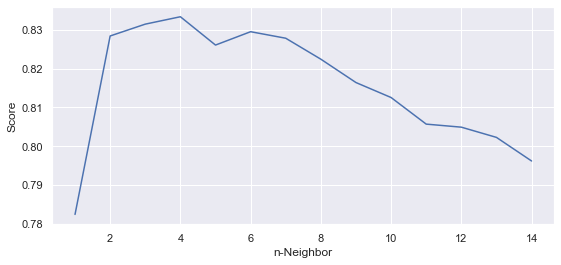

In [11]:
plt.figure(figsize=(9,4))
plt.plot(k_range, test_score)
plt.xlabel('n-Neighbor')
plt.ylabel('Score')
plt.show()

### Parametreler

In [12]:
knn = KNeighborsRegressor()
params = dict(metric = ['euclidean', 'manhattan', 'chebyshev'], weights = ['uniform', 'distance'], n_neighbors = np.arange(1, 15))

In [13]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = knn, param_grid = params, cv = k_fold).fit(X, Y)

In [14]:
gridcv_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}

In [16]:
pd.set_option("display.float_format", "{:.5f}".format)
grid_cv = pd.DataFrame(gridcv_results.cv_results_)
grid_cv = grid_cv[['mean_fit_time', 'param_metric', 'param_weights', 'param_n_neighbors', 'mean_test_score']]
grid_cv = grid_cv.sort_values(by='mean_test_score', ascending = False)
grid_cv.head(5)

,mean_fit_time,param_metric,param_weights,param_n_neighbors,mean_test_score
7,0.00480,euclidean,distance,4,0.75470
11,0.00460,euclidean,distance,6,0.75280
9,0.00460,euclidean,distance,5,0.75239
13,0.00480,euclidean,distance,7,0.75164
5,0.00520,euclidean,distance,3,0.75028


# __BANKA KAMPANYASI__

In [47]:
bk = pd.read_csv('bank_clean.csv')

In [48]:
bk.head(3)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_management,job_retired,job_self-employed,job_services,job_student,job_unemployed,marital_married,education_basic.school,education_high.school,education_professional.course,education_university.degree,housing_yes,loan_yes,customer_yes,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,4,1,0,0,1.10000,94.00000,-36.00000,5.00000,5191.00000,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,4,1,0,0,1.10000,94.00000,-36.00000,5.00000,5191.00000,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,2,1,0,0,1.10000,94.00000,-36.00000,5.00000,5191.00000,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [71]:
Y = bk['y_yes']
X = bk.drop(['y_yes'], axis=1)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [73]:
k_range = np.arange(20, 150, 10)
test_score = np.empty(len(k_range))

for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    knn.fit(x_train, y_train)
    test_score[i] = knn.score(x_test, y_test)

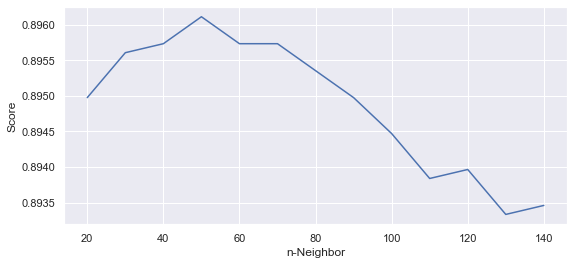

In [74]:
plt.figure(figsize=(9,4))
plt.plot(k_range, test_score)
plt.xlabel('n-Neighbor')
plt.ylabel('Score')
plt.show()

### Parametreler

In [80]:
knn = KNeighborsClassifier()
params = dict(metric = ['euclidean', 'manhattan', 'chebyshev'], weights = ['uniform', 'distance'], n_neighbors = np.arange(45, 60, 5))

In [81]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = knn, param_grid = params, cv = k_fold).fit(X, Y)

In [82]:
gridcv_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'uniform'}

In [85]:
pd.set_option("display.float_format", "{:.5f}".format)
grid_cv = pd.DataFrame(gridcv_results.cv_results_)
grid_cv = grid_cv[['mean_fit_time', 'param_metric', 'param_weights', 'param_n_neighbors', 'mean_test_score']]
grid_cv = grid_cv.sort_values(by='mean_test_score', ascending = False)
grid_cv.head(5)

,mean_fit_time,param_metric,param_weights,param_n_neighbors,mean_test_score
8,1.12611,manhattan,uniform,50,0.89969
6,1.05935,manhattan,uniform,45,0.89957
10,1.05815,manhattan,uniform,55,0.89901
0,0.98699,euclidean,uniform,45,0.89868
2,1.02417,euclidean,uniform,50,0.89866


### Karşılaştırmlar

In [86]:
from imblearn.over_sampling import SMOTE, ADASYN

In [88]:
def modelFrame(X, Y, idx):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)
    
    k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    model = KNeighborsClassifier(n_neighbors = 50, weights = 'uniform', metric = 'manhattan').fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]

    df = pd.Series({'accuracy': accuracy_score(y_test,y_pred),
                    'precision' :precision_score(y_test,y_pred),
                    'recall': recall_score(y_test,y_pred),
                    'f1-score': f1_score(y_test,y_pred),
                    'auc-roc': roc_auc_score(y_test, y_prob),
                    'cross-val': cross_val_score(estimator = KNeighborsClassifier(n_neighbors = 50, weights = 'uniform', metric = 'manhattan'),
                                             X = X, y = Y, cv = k_fold).mean()}, name = idx)
    return df

In [89]:
dfModel = pd.DataFrame(columns = ['cross-val', 'accuracy', 'precision', 'recall', 'f1-score', 'auc-roc'])

Y = bk['y_yes']
X = bk.drop(['y_yes'], axis=1)
dfModel = dfModel.append(modelFrame(X, Y, 'knn'))

x_smote, y_smote = SMOTE(random_state = 42).fit_sample(X, Y)
dfModel = dfModel.append(modelFrame(x_smote, y_smote, 'smote'))

dfModel

,cross-val,accuracy,precision,recall,f1-score,auc-roc
knn,0.89969,0.90268,0.68050,0.19114,0.29845,0.78703
smote,0.80901,0.81386,0.81085,0.81834,0.81457,0.89385
